# First tests of inference methods on the epidemiology problem

In [84]:
import numpy as np
import corner
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [85]:
def load_metrics(simulator='epidemiology2d',
                 method='maf',
                 label='',
                 reference_method='maf',
                 reference_label='',
                 single_theta=False):
    
    reference_path = '../data/results/' + simulator + '/' + reference_method + '/'
    path = '../data/results/' + simulator + '/' + method + '/'
    theta_label = '_singletheta' if single_theta else ''
    
    # Reference likelihood
    log_p_references = []
    for run in range(10):
        run_label = '' if run == 0 else '_run_' +  str(run)
        try:
            log_p_references.append(np.load(reference_path + 'log_p_hat_test' + theta_label + reference_label + run_label + '.npy'))
        except FileNotFoundError:
            pass
    log_p_references = np.array(log_p_references)
    log_p_reference = np.mean(log_p_references, axis=0)
    
    # Calculate metrics
    expected_log_ps = []
    roc_aucs = []
    mses = []
    
    for run in range(10):
        run_label = '' if run == 0 else '_run_' +  str(run)
        try:
            log_p = np.load(
                path + 'log_p_hat_test' + theta_label + label + run_label + '.npy'
            )
            expected_log_ps.append(
                1. / log_p.shape[0] * np.sum(log_p)
            )
            mses.append(
                mean_squared_error(log_p_reference, log_p)
            )
            roc_aucs.append(
                np.load(path + 'roc_auc_surrogate_vs_simulator' + label + run_label + '.npy')[0]
            )
        
        except FileNotFoundError as e:
            pass
        
    expected_log_ps = np.array(expected_log_ps)
    roc_aucs = np.array(roc_aucs)
    mses = np.array(mses)
    
    print('')
    print(method, label)
    print(expected_log_ps)
    print(roc_aucs)
    print(mses)
        
    # Calculate mean and std
    expected_log_p_mean = np.mean(expected_log_ps)
    expected_log_p_uncertainty = np.std(expected_log_ps) / len(expected_log_ps)**0.5
    
    mse_mean = np.mean(mses)
    mse_uncertainty = np.std(mses) / len(mses)**0.5
    
    roc_auc_mean = np.mean(roc_aucs)
    roc_auc_uncertainty = np.std(roc_aucs) / len(roc_aucs)**0.5
    
    if len(roc_aucs) == 0:
        roc_auc_mean = np.nan
        roc_auc_uncertainty = np.nan
    
    return (expected_log_p_mean, expected_log_p_uncertainty,
            mse_mean, mse_uncertainty,
            roc_auc_mean, roc_auc_uncertainty)


## Metrics as function of method and sample size

In [86]:
sample_sizes = [100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]

methods = ['histogram', 'maf', 'maf', 'scandal']
filenames = ['_trainedonsingletheta', '', '_trainedonsingletheta', '']
method_labels = ['Histo', 'MAF', 'MAF (PbP)', 'SCANDAL']


In [87]:
metrics = []

for method, filename in zip(methods, filenames):
    metrics_this_method = []
    
    for sample_size in sample_sizes:
        
        if sample_size == sample_sizes[-1]:
            samplesize_label = ''
        else:
            samplesize_label = '_trainingsamplesize_' + str(sample_size)
            
        metrics_this_method.append(
            load_metrics(
                method=method,
                label= filename + samplesize_label,
                reference_method='maf',
                reference_label='_trainedonsingletheta',
                single_theta=True
            )
        )
        
    metrics.append(metrics_this_method)
    
metrics = np.array(metrics)

expected_log_p_mean = metrics[:,:,0]
expected_log_p_uncertainty = metrics[:,:,1]
mse_mean = metrics[:,:,2]
mse_uncertainty = metrics[:,:,3]
roc_auc_mean = metrics[:,:,4]
roc_auc_uncertainty = metrics[:,:,5]



histogram _trainedonsingletheta_trainingsamplesize_100
[-6.42275415]
[]
[84.74755569]

histogram _trainedonsingletheta_trainingsamplesize_200
[-9.44496582]
[]
[148.21856591]

histogram _trainedonsingletheta_trainingsamplesize_500
[-12.04006144]
[]
[217.73037618]

histogram _trainedonsingletheta_trainingsamplesize_1000
[-13.75548367]
[]
[271.16164704]

histogram _trainedonsingletheta_trainingsamplesize_2000
[-15.24733486]
[]
[322.92733947]

histogram _trainedonsingletheta_trainingsamplesize_5000
[-16.8816273]
[]
[383.83286072]

histogram _trainedonsingletheta_trainingsamplesize_10000
[-18.36488665]
[]
[444.06406131]

histogram _trainedonsingletheta_trainingsamplesize_20000
[-20.08101565]
[]
[519.10772629]

histogram _trainedonsingletheta_trainingsamplesize_50000
[-21.37389372]
[]
[579.82192526]

histogram _trainedonsingletheta
[-22.6186173]
[]
[641.37150336]

maf _trainingsamplesize_100
[-93.77713457]
[1.]
[10430.30438852]

maf _trainingsamplesize_200
[-11.39313659]
[0.99995232]
[206.8

/Users/johannbrehmer/anaconda3/envs/higgs_inference/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/johannbrehmer/anaconda3/envs/higgs_inference/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/johannbrehmer/anaconda3/envs/higgs_inference/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/johannbrehmer/anaconda3/envs/higgs_inference/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/johannbrehmer/anaconda3/envs/higgs_inference/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Performance vs training sample size

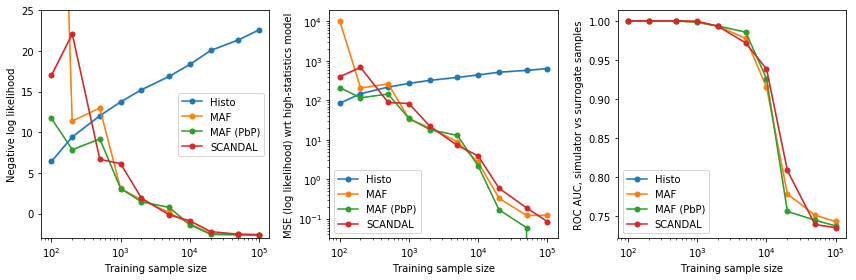

In [88]:
colors = ['C' + str(i) for i in range(10)]

fig = plt.figure(figsize=(12,4))



ax = plt.subplot(1,3,1)

for m, method in enumerate(method_labels):
    plt.fill_between(
        sample_sizes,
        - expected_log_p_mean[m] - expected_log_p_uncertainty[m],
        - expected_log_p_mean[m] + expected_log_p_uncertainty[m],
        color=colors[m],
        alpha=0.3
    )
    
for m, method in enumerate(method_labels):
    plt.plot(
        sample_sizes,
        - expected_log_p_mean[m],
        color=colors[m],
        lw=1.5,
        ls='-',
        marker='o',
        ms=5.,
        label=method
    )
    
plt.legend()

plt.xlabel('Training sample size')
plt.ylabel('Negative log likelihood')
ax.set_xscale("log", nonposx='clip')
plt.ylim(-3.,25.)



ax = plt.subplot(1,3,2)

for m, method in enumerate(method_labels):
    plt.fill_between(
        sample_sizes,
        mse_mean[m] - mse_uncertainty[m],
        mse_mean[m] + mse_uncertainty[m],
        color=colors[m],
        alpha=0.3
    )
    
for m, method in enumerate(method_labels):
    plt.plot(
        sample_sizes,
        mse_mean[m],
        color=colors[m],
        lw=1.5,
        ls='-',
        marker='o',
        ms=5.,
        label=method
    )
    
plt.legend()

plt.xlabel('Training sample size')
plt.ylabel('MSE (log likelihood) wrt high-statistics model')
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')



ax = plt.subplot(1,3,3)

for m, method in enumerate(method_labels):
    plt.fill_between(
        sample_sizes,
        roc_auc_mean[m] - roc_auc_uncertainty[m],
        roc_auc_mean[m] + roc_auc_uncertainty[m],
        color=colors[m],
        alpha=0.3
    )
    
for m, method in enumerate(method_labels):
    plt.plot(
        sample_sizes,
        roc_auc_mean[m],
        color=colors[m],
        lw=1.5,
        ls='-',
        marker='o',
        ms=5.,
        label=method
    )
    
plt.legend()

plt.xlabel('Training sample size')
plt.ylabel('ROC AUC, simulator vs surrogate samples')
ax.set_xscale("log", nonposx='clip')
    
    

plt.tight_layout()
plt.show()


## Original vs simulated samples

In [79]:
x_labels=['Shannon diversity', '# strains', 'Carriage',
        'Coinfection', 'Prevalence most common strain', '# singletons']
x_ranges = [(0.8,3.0), (3.5,22.5), (0.5, 1.), (0.,0.4), (0.,0.6), (-0.5,12.5)]
x_bins = [20, 19, 10, 7, 12, 12]

x_simulator = np.load('../data/samples/epidemiology2d/x_test_singletheta.npy')
x_maf = np.load('../data/results/epidemiology2d/maf/samples_from_p_hat_trainedonsingletheta.npy')

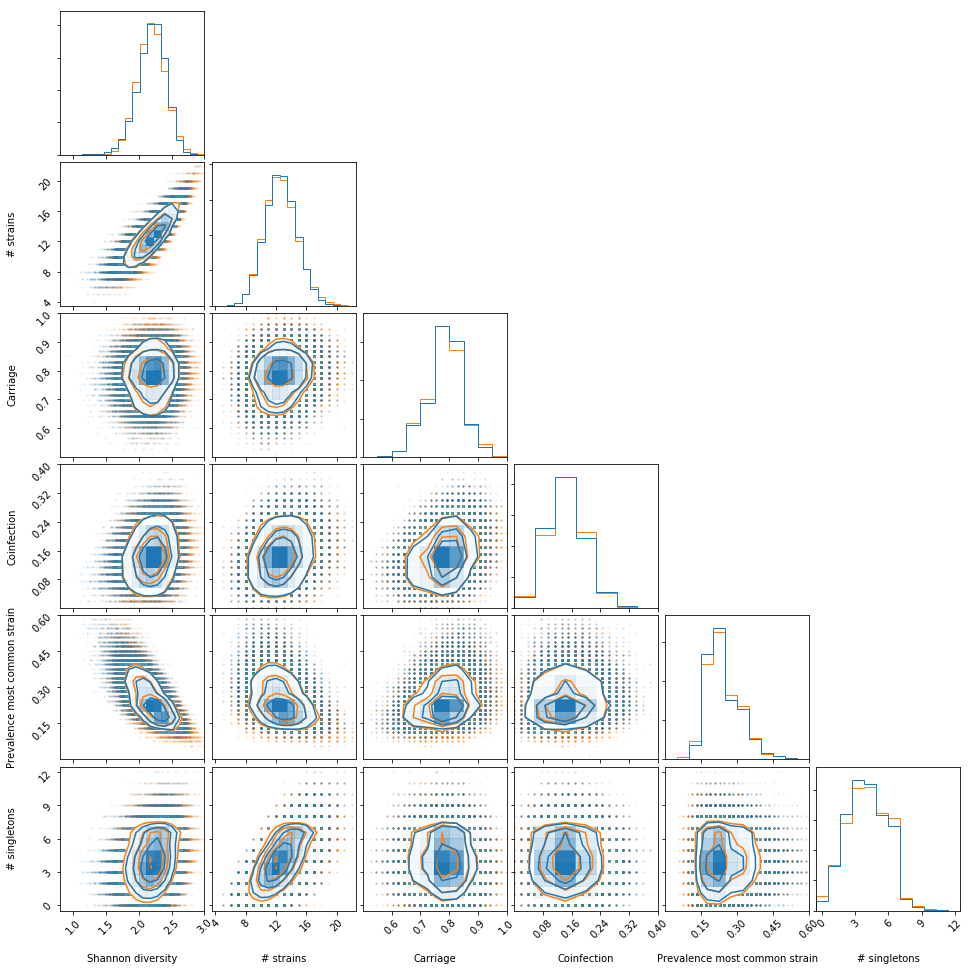

In [80]:
fig = corner.corner(x_maf,
                   labels=x_labels,
                   range=x_ranges,
                   bins=x_bins,
                   color='C1', alpha=0.5)
_ = corner.corner(x_simulator,
                   fig=fig,
                   labels=x_labels,
                   range=x_ranges,
                   bins=x_bins,
                   color='C0', alpha=0.5)